In [98]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns

In [99]:
data=pd.read_csv('Mall_Customers.csv') # Load Data set
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [100]:
print("Missing Values: ",data.isnull().sum()) # Identifying missing values in the dataset
print(data.describe()) 

Missing Values:  CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [101]:
print(data.info())
print("The Duplicate Values are :",data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
The Duplicate Values are : 0


In [102]:
# Mostly customers' annual income 
print("Mostly Customers having annual income:\n",data['Annual Income (k$)'].mode())
#min,max,average annual income 
print("Minimum Annual Income:",data['Annual Income (k$)'].min())
print("Maximum Annual Income:",data['Annual Income (k$)'].max())
print("Average Annual Income:",data['Annual Income (k$)'].mean())

Mostly Customers having annual income:
 0    54
1    78
Name: Annual Income (k$), dtype: int64
Minimum Annual Income: 15
Maximum Annual Income: 137
Average Annual Income: 60.56


In [103]:
#minimum annual income 
print("Average Spending Score:",data['Spending Score (1-100)'].mean())
print("Mostly Customers have Spending Score:",data['Spending Score (1-100)'].mode()[0])

Average Spending Score: 50.2
Mostly Customers have Spending Score: 42


Most of the Customers are : Female


<Axes: xlabel='Genre', ylabel='count'>

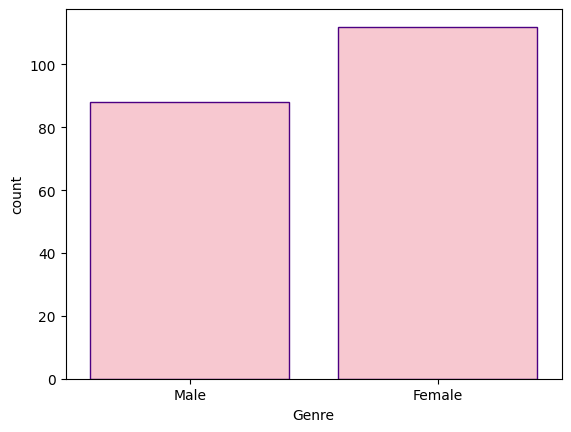

In [104]:
print("Most of the Customers are :",data['Genre'].mode()[0])
#Visualize the Genre Feature
sns.countplot(x='Genre',data=data,color="pink",edgecolor="indigo")

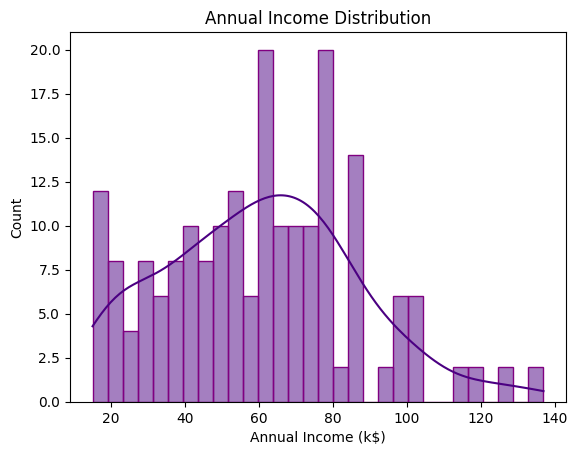

In [105]:
# Visualizing Annual Income
sns.histplot(data["Annual Income (k$)"],bins=30,kde=True,edgecolor="Purple",color="Indigo")
mp.title('Annual Income Distribution')
mp.show()

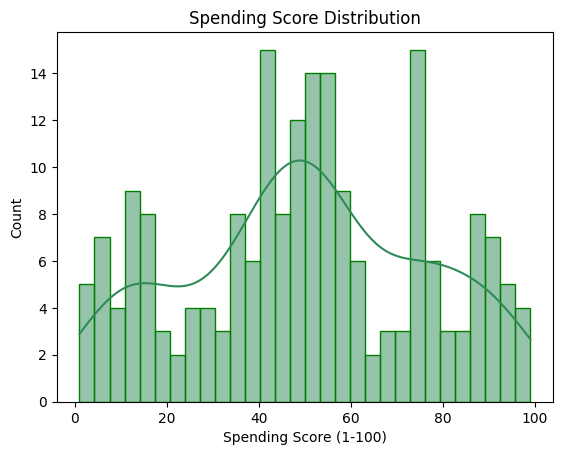

In [106]:
#Visualizing Spending Score
sns.histplot(data["Spending Score (1-100)"],bins=30,kde=True,edgecolor="green",color="seagreen")
mp.title('Spending Score Distribution')
mp.show()

In [107]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
data['Genre']=encode.fit_transform(data['Genre'])
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [109]:
features=['Age','Genre','Annual Income (k$)','Spending Score (1-100)']
scale=StandardScaler()
scaled_ft=scale.fit_transform(data[features])
#Drop Customer ID column as it is only an identifier
data.drop('CustomerID',axis=1,inplace=True)
data


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


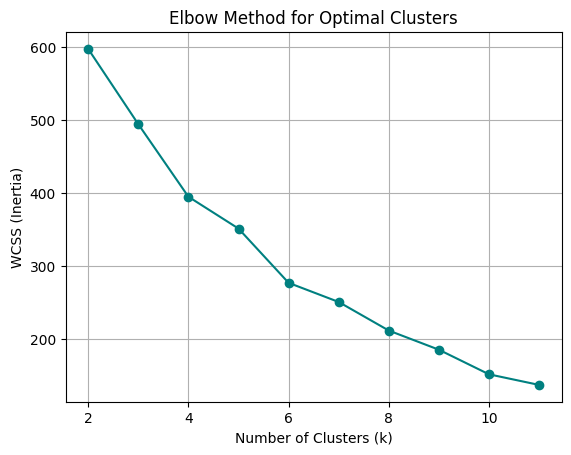

In [112]:
# Finding Optimal Number of Clusters using Elbow Method
iner_scores = []  # Stores Within cluster sum square values
clus_range = range(2, 12)  # Number of clusters to test

for cluster_count in clus_range:
    kmeans_model = KMeans(n_clusters=cluster_count, init='k-means++', random_state=42)
    kmeans_model.fit(scaled_ft)
    iner_scores.append(kmeans_model.inertia_) # inertia is to measure how tighten the clusters are

# Plotting the results and identifying the elbow point
mp.plot(clus_range, iner_scores, color='teal',marker='o')
mp.title('Elbow Method for Optimal Clusters')
mp.xlabel('Number of Clusters (k)')
mp.ylabel('WCSS (Inertia)')
mp.grid(True)
mp.show()

In [ ]:
# As from the above figure that elbow forms at the point showing optimal number of clusters should be 4 so we shall apply kmeans model having n_clusters = 4 
# As it will form different groups
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42) # taking init as k-means++ for better and faster clustering
cluster_labels = kmeans.fit_predict(scaled_ft)
# Add the cluster labels to your dataset
data['Cluster'] = cluster_labels

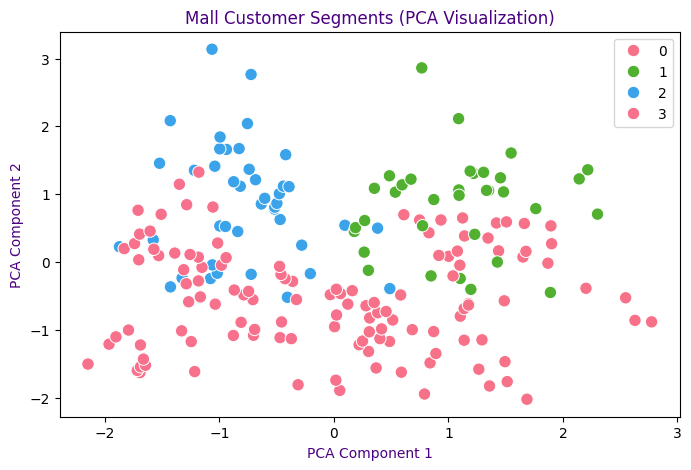

In [ ]:
# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_ft)

# Create a scatterplot
mp.figure(figsize=(8, 5))
sns.scatterplot(
    x=pca_components[:, 0], # x-axis
    y=pca_components[:, 1], # y-axis
    hue=data['Cluster'],
    palette='husl', 
    s=80 # size of the points
)
mp.title('Mall Customer Segments (PCA Visualization)',color="indigo")
mp.xlabel('PCA Component 1',color="indigo")
mp.ylabel('PCA Component 2',color="indigo")
mp.legend()
mp.show()


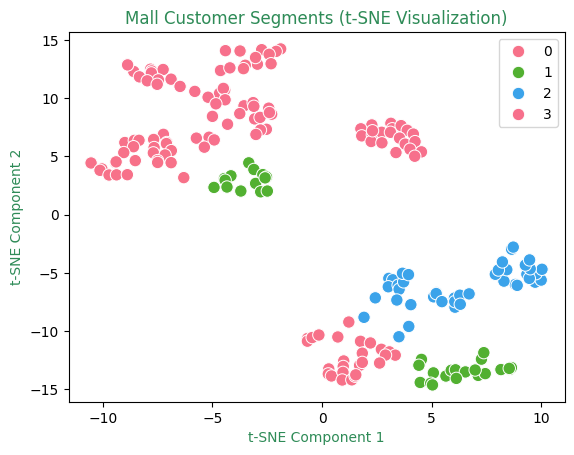

In [136]:
#t-Distribued Stochastic Neighbor Embedding
tsne = TSNE(n_components=2, random_state=42,max_iter=1000)
tsne_features = tsne.fit_transform(scaled_ft)
sns.scatterplot(x= tsne_features[:, 0], y=tsne_features[:, 1],hue=data['Cluster'],palette='husl',s=80)
mp.title('Mall Customer Segments (t-SNE Visualization)', color='seagreen')
mp.xlabel('t-SNE Component 1', color='seagreen')
mp.ylabel('t-SNE Component 2', color='seagreen')
mp.legend()
mp.show()


         Genre    Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                          
0         0.43  54.70                46.9                   39.93
1         0.59  41.26                88.5                   16.76
2         1.00  28.69                60.9                   70.24
3         0.00  29.38                58.3                   64.44


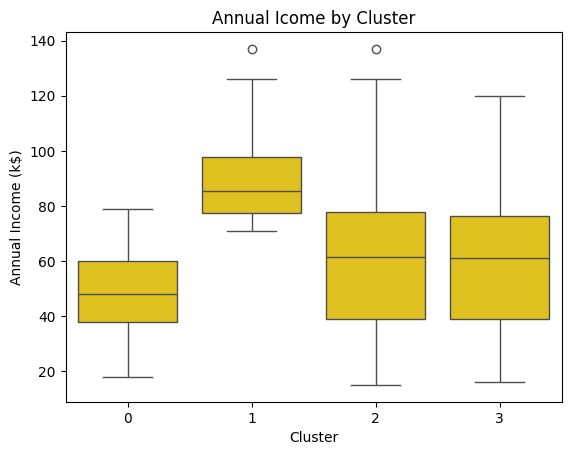

In [ ]:
cluster_summary = data.groupby('Cluster').mean().round(2)
print(cluster_summary)
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=data,color="gold")
mp.title('Annual Income by Cluster')
mp.show()

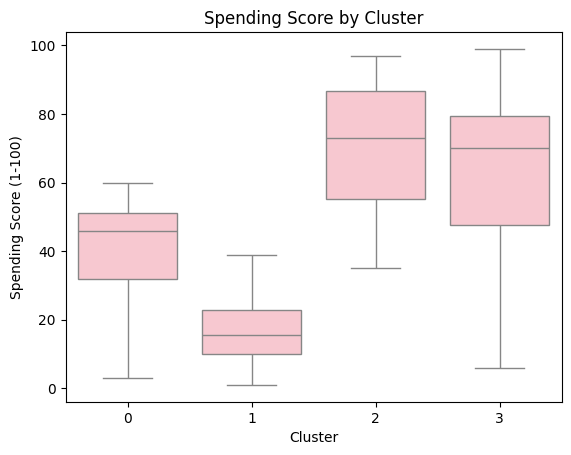

In [154]:
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=data,color='pink')
mp.title ("Spending Score by Cluster")
mp.show()

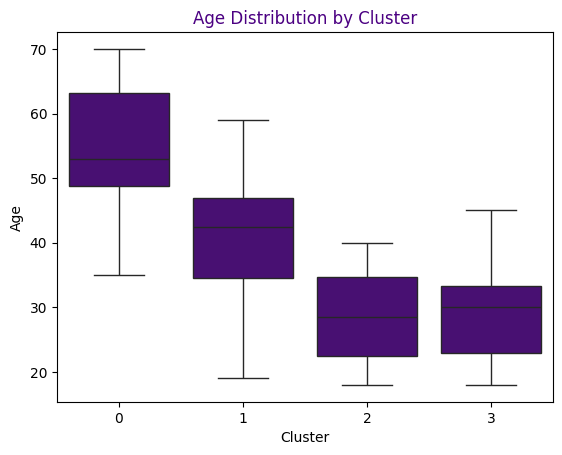

In [153]:
sns.boxplot(x='Cluster', y='Age', data=data,color='indigo')
mp.title("Age Distribution by Cluster", color='indigo')
mp.show()

## Conclusion:
- Cluster 0: Older customers, moderate income, average spenders
- Cluster 1: High-income customers, conservative spenders
- Cluster 2: Young males, high income, large spenders
- Cluster 3: Young females, good income, frequent spenders
- Each cluster reflects different potential marketing strategies